how to do your toa scan efficiency.

In [ ]:
# import data

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('toa_vref_scan_20250710_170132.csv',
                  skiprows = 1)

In [11]:
print(data)

        TOA_VREF  0  1  2  3  4  5  6  7  8  ...  62  63  64  65  66  67  68  \
0              0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
1              0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
2              0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
3              0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
4              0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
...          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
255994       255  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
255995       255  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
255996       255  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
255997       255  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   
255998       255  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   

        69  70  71  
0        0   0   0

In [12]:
# get the toa_vref you want
vref = 0
filtered_data = data[data['TOA_VREF'] == vref] # just for 0 now
# print(filtered_data)
# print(len(filtered_data))

# then drop that first "TOA_VREF" column
no_vref = filtered_data.drop('TOA_VREF', axis = 1)

In [13]:
# get the non-zero values for channel 0
chan = 0
non_zero = no_vref[no_vref[str(chan)] != 0] # saves all your df, but only computes on channel = 'chan'

# I guess you don't really need to get the no_vref first, since you're still only working on the one column. hmmm

chan_triggers = [len(non_zero)]

In [14]:
print(non_zero)
print(chan_triggers)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
Index: []

[0 rows x 72 columns]
[0]


In [15]:
# now make it into a loop.

# make the channel lists
chan_lists = []
for chan in range(72):
    chan_lists.append([])
# each index of chan_lists is the channel number
# each of those indices will contain a list. Each index of that list will be the
# value of toa_vref being looked at.
# then, what we're going to do is append to each list in the chan_lists the value
# of toa_efficiency as we go along.

In [16]:
unique_toa_vrefs = data['TOA_VREF'].unique()

for toa_vref in unique_toa_vrefs:
    # print('looking at toa_vref = ' + str(toa_vref))
    filtered_data = data[data['TOA_VREF'] == toa_vref]
    for chan in range(72):
        non_zero = filtered_data[filtered_data[str(chan)] != 0]
        chan_triggers = len(non_zero)
        chan_toa_eff = chan_triggers / len(filtered_data)
        chan_lists[chan].append(chan_toa_eff)
# print(filtered_data)

In [21]:
print(unique_toa_vrefs)
print(chan_lists[2])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

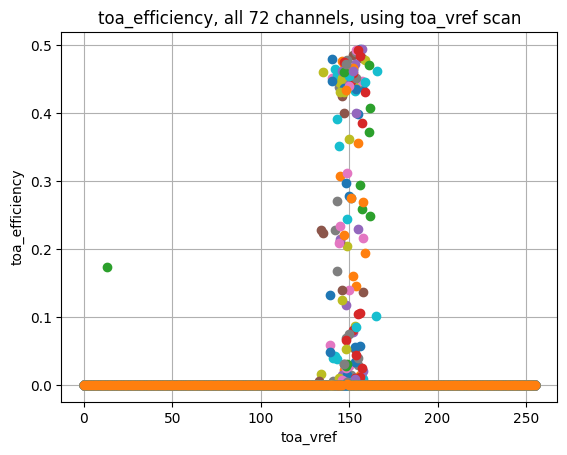

In [28]:
for chan in range(72):
    plt.plot(chan_lists[chan], marker = 'o', linestyle = 'none')
plt.xlabel('toa_vref')
plt.ylabel('toa_efficiency')
plt.title('toa_efficiency, all 72 channels, using toa_vref scan')
plt.grid()

plt.savefig('first_toa_efficiency_graph.png')